In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "drive/MyDrive/data/PlantVillage"
)

Found 2152 files belonging to 3 classes.


In [ ]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
class_name=dataset.class_names

In [ ]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 0 0 1 0 0 0 1 2 0 2 1 0 0 1 2 0 0 1 1 0 1 1 1 0 1 1]


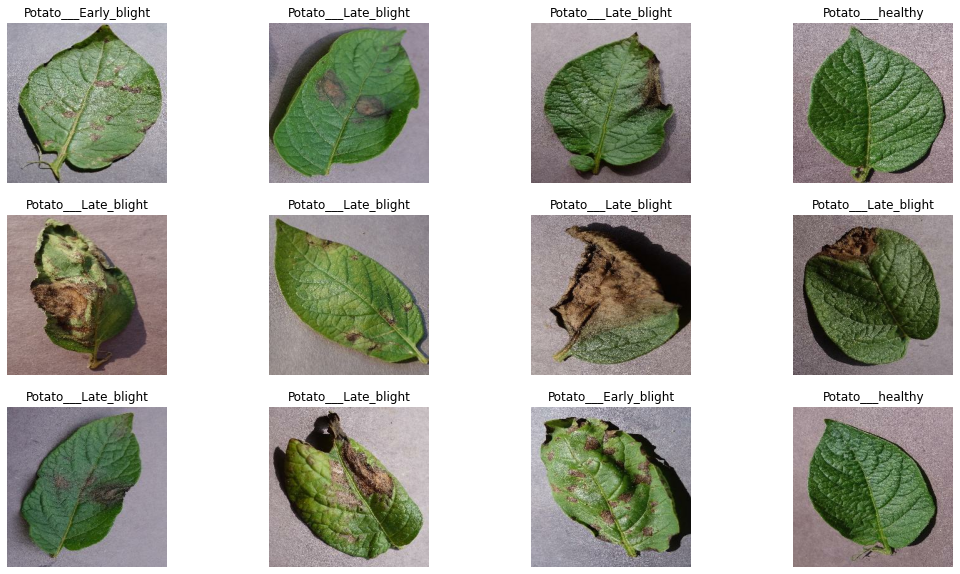

In [ ]:
plt.figure(figsize=(18, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = dataset.take(54)

In [ ]:
test_ds = dataset.skip(54)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

14

In [ ]:
val_ds=test_ds.take(6)

In [ ]:
test_ds=test_ds.skip(6)

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=30,
)

Epoch 1/30
54/54 [==============================] - 545s 10s/step - loss: 2.4871 - accuracy: 0.5046 - val_loss: 0.9116 - val_accuracy: 0.5990
Epoch 2/30
54/54 [==============================] - 9s 151ms/step - loss: 0.9394 - accuracy: 0.5677 - val_loss: 0.8809 - val_accuracy: 0.5833
Epoch 3/30
54/54 [==============================] - 8s 150ms/step - loss: 0.7808 - accuracy: 0.7095 - val_loss: 0.7006 - val_accuracy: 0.7656
Epoch 4/30
54/54 [==============================] - 9s 151ms/step - loss: 0.7042 - accuracy: 0.7297 - val_loss: 0.5698 - val_accuracy: 0.7865
Epoch 5/30
54/54 [==============================] - 9s 152ms/step - loss: 0.6165 - accuracy: 0.7789 - val_loss: 0.7200 - val_accuracy: 0.6927
Epoch 6/30
54/54 [==============================] - 9s 152ms/step - loss: 0.6056 - accuracy: 0.7691 - val_loss: 0.5363 - val_accuracy: 0.8281
Epoch 7/30
54/54 [==============================] - 9s 151ms/step - loss: 0.5114 - accuracy: 0.8148 - val_loss: 0.5265 - val_accuracy: 0.7969
Epoch 

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 4s 60ms/step - loss: 0.4089 - accuracy: 0.9052


[0.4088820517063141, 0.9051724076271057]

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 14ms/step


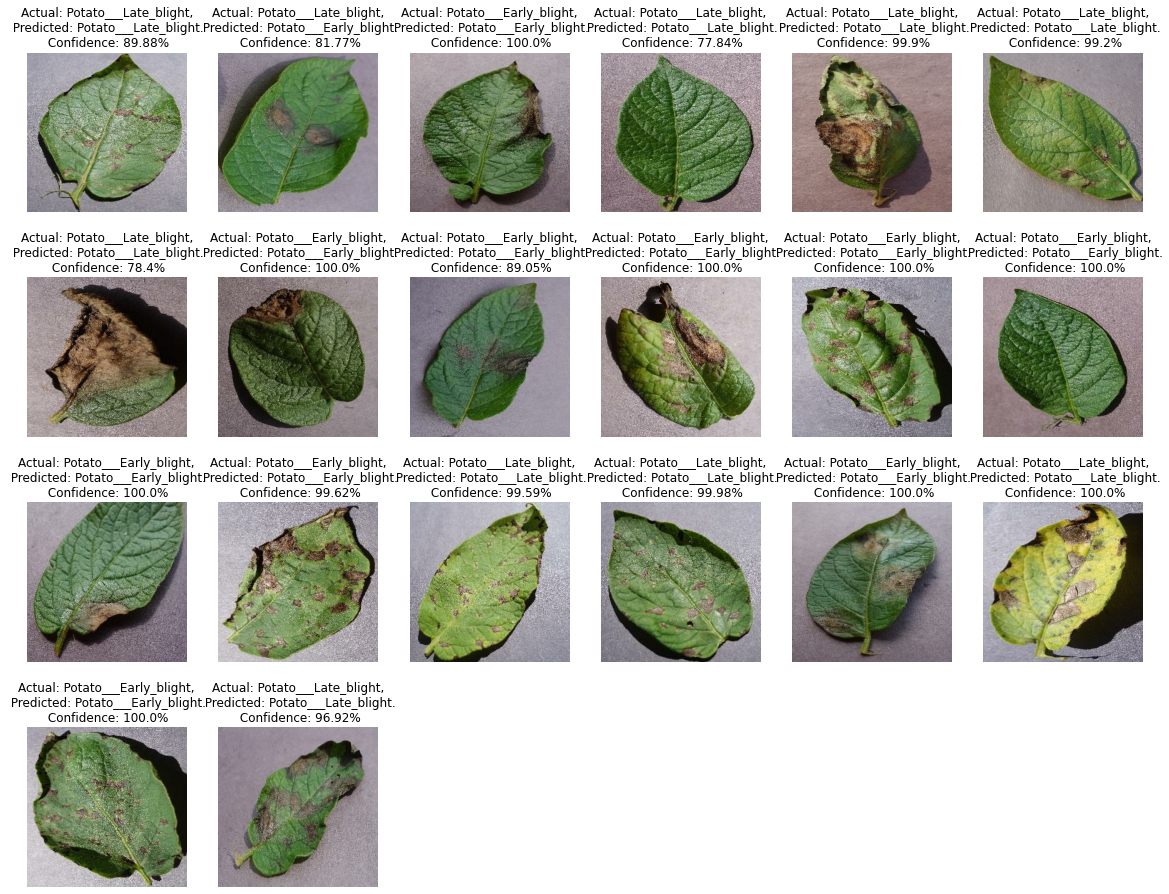

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds:
    for i in range(20):
        ax = plt.subplot(5,6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break